<a href="https://colab.research.google.com/github/anamarigarzon/IR-Image-Analysis-in-Power-Systems/blob/main/IR_image_analysis_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thermographic Image Analysis - Transformer**

Dataset: https://ieeexplore-ieee-org.ez.urosario.edu.co/document/9349599

In this project Infrared Thermographic Images are processed to identify and classify transformer failures.

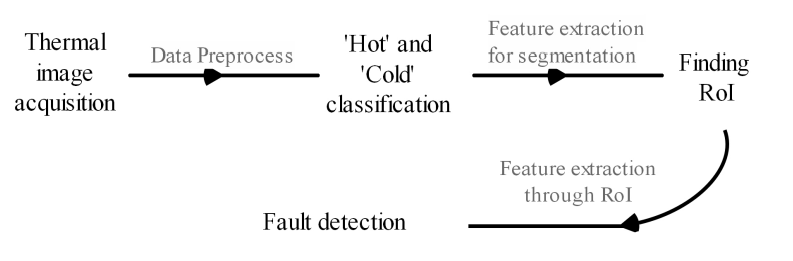


Packages:

In [ ]:
import cv2 # Computer Vision Implementations in Python
import matplotlib.pyplot as plt # Create graphic visualizations in Python
import numpy as np #support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd
import os 
from google.colab import drive

** **

### **DATA PREPROCESS**

The first step is to get access to the images folder. This project was coded in Google Colab and the images were stored in a personal Google Drive folder. If you wish to execute it you can skip this process as the vectorization is stored in "dataset_motor.csv" that is included in the repository.

In [ ]:
drive.mount("/content/drive") # Access drive folder for Google Colab

Mounted at /content/drive


Now, as the images have the same shape (240x320), we create a dataset that has a first column with the name of the file. The next step is to import the images in BGR space color (by defect in open cv), vectorize them by pixel and add a column with the image data. 

After that, the images are converted to gray and we get the maximum, minimum, mean and standard deviation of the values in gray scale, and we add them to the dataset. Finally, we add the label column.

To add the column with the image data we need to encode and decode the image. vectorizing it, converting it into a string. So next we have the code and decode functions:

In [ ]:
def vectorize_image(image_data):
  image_string = ''
  for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
      for k in range(image_data.shape[2]):
        image_string += str(image_data[i][j][k])+','
  return image_string

def reverse_img_vectorization(image_string, num_rows, num_columns, space_color_dim):
  img_list = image_string.split(',')
  count = 0
  image_arr = []
  for i in range(num_rows):
    column = []
    for j in range(num_columns):
      color = []
      for k in range(space_color_dim):
        color.append(int(img_list[count]))
        count += 1
      column.append(color)
    image_arr.append(column)
  return image_arr

Creation of the dataset

In [ ]:
dataset_transformer = pd.DataFrame() # Create dataset for the transformer
labels = ['p1_Noload','p2_80','p3_160','p4_240','p5_320','p6_400','p7_480','p8_560','p9_600'] # Failure or state label
hot_labels = ['p6_400','p7_480','p8_560','p9_600']
cold_labels = ['p1_Noload','p2_80','p3_160','p4_240','p5_320']

filenames = [] # list to store filenames 
image_data = [] # list to store image data
labels_list = [] # list to store labels
max_values = [] # list to store max value
min_values = [] # list to store min value
mean_values = [] # list to store mean value
std_values = [] # list to store standard deviation
temp_labels = [] # list to store temperature labels

# Importing images
for label in labels:
  folder_name = '/content/drive/My Drive/IR_Images/Image_classification/IR_trans_bmp/'+ label # Access the image
  for filename in os.listdir(folder_name):
    filenames.append(str(f'{filename}')) 
    image_file = f'{folder_name}/{filename}' # name of the file
    image_cv_read = np.array(cv2.imread(image_file)) # read image file
    image_gray = np.array(cv2.cvtColor(image_cv_read, cv2.COLOR_BGR2GRAY)) # image file in grayscale

    # Get values from grayscale image
    max_value = image_gray.max()
    min_value = image_gray.min()
    mean_value = np.mean(image_gray)
    std_value = np.std(image_gray)

    # Temperature labels
    if label in hot_labels:
      temp_label = 1 # cold images label = 0
    elif label in cold_labels:
      temp_label = 0 # cold images label = 0
    else:
      print('error')
      print(label)
    
    temp_labels.append(temp_label)

    # Add values to lists
    image_data.append(vectorize_image(image_cv_read))
    labels_list.append(label)
    max_values.append(max_value)
    min_values.append(min_value)
    mean_values.append(mean_value)
    std_values.append(std_value)


dataset_transformer['filename'] = filenames
dataset_transformer['image_data_BGR'] = image_data
dataset_transformer['max_value'] = max_values
dataset_transformer['min_value'] = min_values
dataset_transformer['mean_value'] = mean_values
dataset_transformer['std_value'] = std_values
dataset_transformer['temp_label'] = temp_labels
dataset_transformer['label'] = labels_list

dataset_transformer

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label
0,p1014.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.172344,9.033984,0,p1_Noload
1,p1006.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,22.899714,8.748136,0,p1_Noload
2,p1009.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.860182,8.807629,0,p1_Noload
3,p1015.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,21.976549,9.010382,0,p1_Noload
4,p1019.bmp,"96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,99,1...",48,12,22.370872,9.140633,0,p1_Noload
...,...,...,...,...,...,...,...,...
250,p9119.bmp,"150,0,104,150,0,104,150,0,104,150,0,104,151,0,...",255,20,65.031315,49.438930,1,p9_600
251,p9087.bmp,"151,0,107,151,0,107,151,0,107,151,0,107,151,0,...",255,17,61.775820,48.363031,1,p9_600
252,p9116.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,140,1,70,1...",255,18,63.945937,49.061239,1,p9_600
253,p9109.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,141,1,75,1...",255,18,63.790052,49.066734,1,p9_600


Export data to csv


In [ ]:
dataset_transformer.to_csv('dataset_transformer.csv')

### **'HOT' AND 'COLD' CLASSIFICATION**

To classify between hot and cold images, the maximum values of the pixel are taken.

In [ ]:
cold_images_max = np.array(dataset_transformer[dataset_transformer['temp_label'] == 0]['max_value'])
hot_images_max = np.array(dataset_transformer[dataset_transformer['temp_label'] == 1]['max_value'])

In [ ]:
cold_y_values = np.empty(np.shape(np.array(cold_images_max)),dtype=np.int64)
cold_y_values.fill(0)

hot_y_values = np.empty(np.shape(np.array(hot_images_max)),dtype=np.int64)
hot_y_values.fill(1)


In [ ]:
x_values = np.concatenate((cold_images_max, hot_images_max))
y_values = np.concatenate((cold_y_values, hot_y_values))

Split train and test data

In [ ]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, random_state=1)

Explore train data

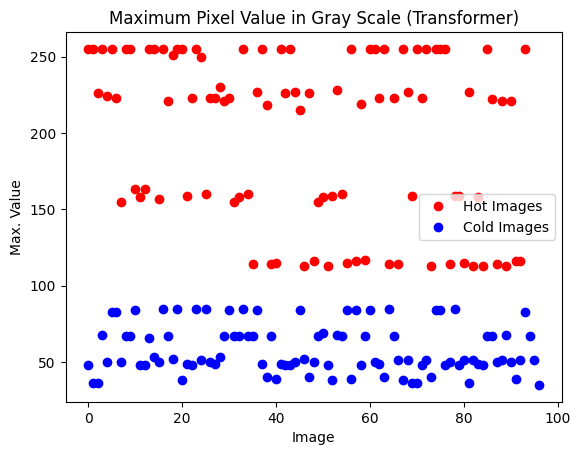

In [ ]:
# Plot train data
plt.figure()
plt.title('Maximum Pixel Value in Gray Scale (Transformer)')
plt.plot(X_train[y_train==1],'o',color='red')
plt.plot(X_train[y_train==0],'o',color='blue')
plt.legend(["Hot Images","Cold Images"])
plt.xlabel('Image')
plt.ylabel('Max. Value')
plt.show()

As it is shown in the figure, there is a clear difference between the maximum values of the pixels of the cold and the hot images. In this sense, the classification can be done by setting a linear threshold using SVM

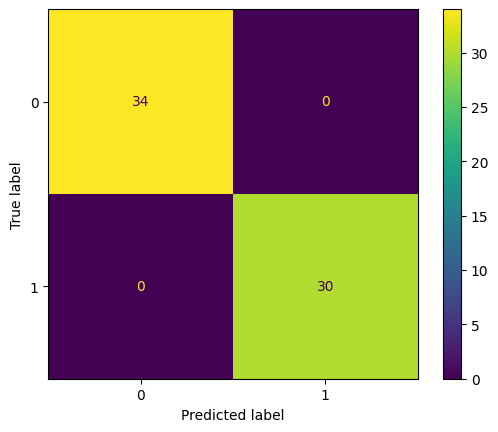

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = svm.SVC(random_state=0)
clf.fit(X_train.reshape(-1, 1), y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

It makes a perfect classification (which is not surprising due to the fact that the classes are quite distant). However, from the plot of the train data it is evident that the data is grouped in more than two subgroups focusing only on the max_value pixel. In this sense, we are going to explore the dataset with KMeans trying to distinguish those subgroups and the number of clusters is going to be determined through the elbow method.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

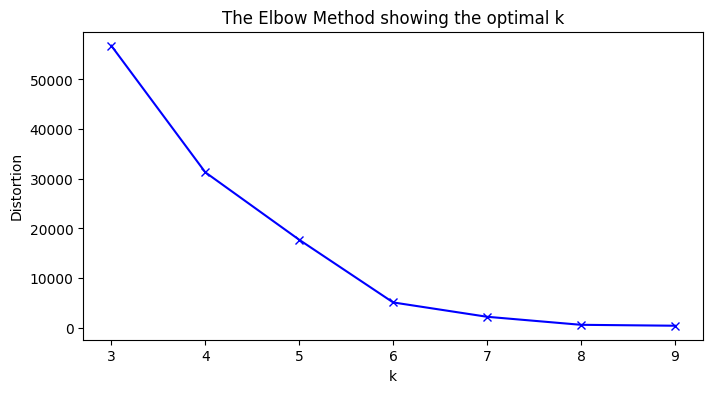

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(3,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=28)
    kmeanModel.fit(X_train.reshape(-1, 1))
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is evident that for 2 < k < 10 the "elbow" is 6. So the KMeans model will be implemented with k = 6.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-a0ef6beaa77e>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)


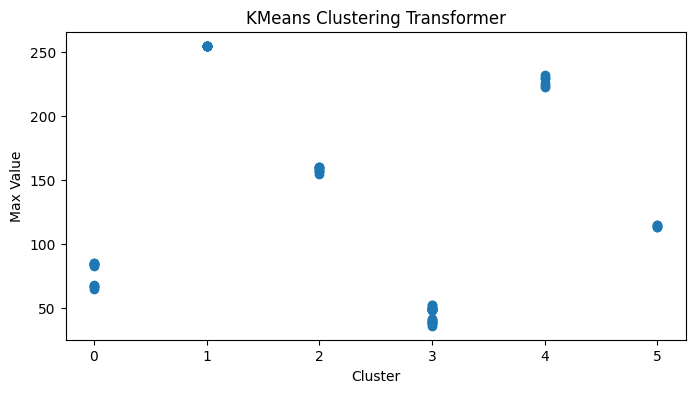

In [ ]:
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(X_train.reshape(-1, 1))
y_kmeans = kmeanModel.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.scatter(y_kmeans,X_test.reshape(-1, 1), cmap=plt.cm.Set1)
plt.xlabel('Cluster')
plt.ylabel('Max Value')
plt.title('KMeans Clustering Transformer')
plt.show()

To find the Region of Interest (RoI), the cluster classification will be added to the dataset and the segmentation parameters will be assigned conveniently according to their cluster classification.

In [ ]:
max_values_for_classification = np.array(dataset_transformer['max_value'])
clusters_labels = kmeanModel.predict(max_values_for_classification.reshape(-1, 1))
dataset_transformer['clusters'] = clusters_labels
dataset_transformer

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label,clusters
0,p1014.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.172344,9.033984,0,p1_Noload,3
1,p1006.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,22.899714,8.748136,0,p1_Noload,3
2,p1009.bmp,"103,1,14,103,1,14,103,1,14,103,1,14,103,1,14,1...",48,12,22.860182,8.807629,0,p1_Noload,3
3,p1015.bmp,"107,1,19,107,1,19,107,1,19,107,1,19,107,1,19,1...",48,12,21.976549,9.010382,0,p1_Noload,3
4,p1019.bmp,"96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,96,1,7,99,1...",48,12,22.370872,9.140633,0,p1_Noload,3
...,...,...,...,...,...,...,...,...,...
250,p9119.bmp,"150,0,104,150,0,104,150,0,104,150,0,104,151,0,...",255,20,65.031315,49.438930,1,p9_600,1
251,p9087.bmp,"151,0,107,151,0,107,151,0,107,151,0,107,151,0,...",255,17,61.775820,48.363031,1,p9_600,1
252,p9116.bmp,"135,1,59,135,1,59,135,1,59,135,1,59,140,1,70,1...",255,18,63.945937,49.061239,1,p9_600,1
253,p9109.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,141,1,75,1...",255,18,63.790052,49.066734,1,p9_600,1


Export data to csv


In [ ]:
dataset_transformer.to_csv('dataset_transformer.csv')

Selection of one image per cluster to draw the final masks

In [ ]:
dataset_transformer[dataset_transformer['clusters'] == 5]

,filename,image_data_BGR,max_value,min_value,mean_value,std_value,temp_label,label,clusters
131,p6009.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,140,1,71,1...",114,12,34.225326,24.480272,1,p6_400,5
132,p6021.bmp,"106,1,17,106,1,17,106,1,17,106,1,17,110,1,22,1...",113,12,33.665117,24.406377,1,p6_400,5
133,p6025.bmp,"120,0,34,120,0,34,120,0,34,120,0,34,128,1,47,1...",113,12,33.110378,24.238048,1,p6_400,5
134,p6020.bmp,"128,1,47,128,1,47,128,1,47,128,1,47,133,1,56,1...",113,12,33.154076,24.301928,1,p6_400,5
135,p6003.bmp,"110,1,22,110,1,22,110,1,22,110,1,22,116,0,29,1...",117,12,38.108542,23.972779,1,p6_400,5
136,p6015.bmp,"138,1,66,138,1,66,138,1,66,138,1,66,140,1,71,1...",113,12,33.946003,24.456676,1,p6_400,5
137,p6005.bmp,"106,1,17,106,1,17,106,1,17,106,1,17,110,1,22,1...",116,12,37.583112,24.102917,1,p6_400,5
138,p6007.bmp,"113,0,26,113,0,26,113,0,26,113,0,26,120,0,34,1...",115,12,35.294466,24.457711,1,p6_400,5
139,p6006.bmp,"99,1,10,99,1,10,99,1,10,99,1,10,103,1,14,107,1...",115,12,35.879883,24.359104,1,p6_400,5
140,p6004.bmp,"106,1,17,106,1,17,106,1,17,106,1,17,107,1,19,1...",116,12,37.053971,24.216687,1,p6_400,5


In [ ]:
print(dataset_transformer[dataset_transformer['filename'] == 'p5045.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p9109.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p7049.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p1014.bmp']['clusters']) #
print(dataset_transformer[dataset_transformer['filename'] == 'p8078.bmp']['clusters'])
print(dataset_transformer[dataset_transformer['filename'] == 'p6020.bmp']['clusters'])

127    0
Name: clusters, dtype: int32
253    1
Name: clusters, dtype: int32
177    2
Name: clusters, dtype: int32
0    3
Name: clusters, dtype: int32
211    4
Name: clusters, dtype: int32
134    5
Name: clusters, dtype: int32
